## What is the problem, what is the main question we want to answer?

### The question is: "What should my daughter study in college or university to ensure she gets a job?"/ "how major fields of study impact labour force outcomes for Canadians?"

This question has several dimensions we need to zoom out! Let's break it down.

1- Major fields of study.

2- Labour force outcome.

3- Canadians.

Those are the main key factors we will try to figure out what kind of connection/ correlation between them. Nevertheless, there should be some other related characteristics that can add some information to answer our question such as the gender. 

To answer this question, we need to build a knowledge base as a result of analyzing some historical data or past experiences. 

We can divide our data into two main parts: 

1- Target variable(s) is the dependent variable that we are looking to evaluate or predict. We have the "labour force outcome" as a target variable.

2- Features or predictors  are the independent variables that can impact the target variable. 

What metrics we can use to evaluate the labour force outcome?

Labour Force Outcome represents the already-employed people and the people who are looking for a job, excluding those people who are jobless and not willing to get a job or not actively looking for a job (e.g., housewives, retirees, etc). So several metrics can be used to study the labour force outcome, for example: employment rate, unemployment rate, salaries and wages. 

#### What data that can answer our question?

After sometime of searching for a good data (up to date, large enough to solve the problem, and covers the main features of our interest), I decided to go with a data set offered by Statistics Canada.

https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=4&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1354588&GK=1&GRP=1&O=D&PID=111847&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2017&THEME=124&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0

Let's dive in!

In [297]:
## Importing the required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

##Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import dexplot as dxp


## Reading Data

In [300]:
Data_dir = Path('C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/LabourForceOutcome_data.csv')
Data_dir

WindowsPath('C:/Users/KBrig/Labour-Force-Outcome-Data-Analysis/LabourForceOutcome_data.csv')

In [301]:
Tot_data = pd.read_csv(Data_dir)

How does our data look like?

In [302]:
Tot_data.head(3)

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
0,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,1,6.0,28643015,18672470,17230035,1442430,9970545,65.2,60.2,7.7
1,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,2,NaN,12815975,6825825,6098850,726975,5990155,53.3,47.6,10.7
2,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,3,NaN,205930,161910,154270,7635,44020,78.6,74.9,4.7


## Data Cleaning

In [421]:
len(Canada_data_final['DIM: Sex (3)']=='Male')

3280

In [425]:
Canada_data_final.shape

(3280, 27)

In [426]:
len(Canada_data_final['DIM: Sex (3)']=='Female')

3280

In [428]:
Canada_data_final['DIM: Sex (3)'].unique()

array(['Male', 'Female'], dtype=object)

## What features/variables do we have here?

In [303]:
Tot_data.columns

Index(['CENSUS_YEAR', 'GEO_CODE (POR)', 'GEO_LEVEL', 'GEO_NAME', 'GNR',
       'DATA_QUALITY_FLAG', 'ALT_GEO_CODE',
       'DIM: Highest certificate, diploma or degree (11)',
       'Member ID: Highest certificate, diploma or degree (11)',
       'Notes: Highest certificate, diploma or degree (11)', 'DIM: Age (9)',
       'Member ID: Age (9)', 'Notes: Age (9)', 'DIM: Sex (3)',
       'Member ID: Sex (3)', 'Notes: Sex (3)',
       'DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)',
       'Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)',
       'Dim: Labour force status (8): Member ID: [2]: In the labour force',
       'Dim: Labour force status (8): Member ID: [3]: Employed',
       'Dim: Labour force status (8): Member 

In [304]:
Tot_data.GEO_NAME.unique()

array(['Canada', 'Newfoundland and Labrador', 'Division No. 1',
       'Division No. 2', 'Division No. 3', 'Division No. 4',
       'Division No. 5', 'Division No. 6', 'Division No. 7',
       'Division No. 8', 'Division No. 9', 'Division No. 10',
       'Division No. 11', 'Prince Edward Island', 'Kings', 'Queens',
       'Prince', 'Nova Scotia', 'Shelburne', 'Yarmouth', 'Digby',
       'Annapolis', 'Lunenburg', 'Hants', 'Halifax', 'Colchester',
       'Cumberland', 'Pictou', 'Guysborough', 'Antigonish', 'Inverness',
       'Richmond', 'Cape Breton', 'Victoria', 'New Brunswick',
       'Saint John', 'Charlotte', 'Sunbury', 'Albert', 'Westmorland',
       'Kent', 'Northumberland', 'York', 'Carleton', 'Madawaska',
       'Restigouche', 'Gloucester', 'Quebec', 'Les Îles-de-la-Madeleine',
       'Le Rocher-Percé', 'La Côte-de-Gaspé', 'La Haute-Gaspésie',
       'Bonaventure', 'Avignon', 'La Matapédia', 'Matane', 'La Mitis',
       'Rimouski-Neigette', 'Les Basques', 'Rivière-du-Loup',
    

I can see that we have various hierarchies of the geographic areas, so it is more logical to compare data of the same category (e.g., Canada only,provinces only, devisions only, regions only,etc). I would start first with the samples that do not specify the geographic area inside Canada(i.e., GEO_NAME='Canada'). Nevertheless, we can later have another part that studies the impact of the geographical differences. 

In [305]:
Canada_data = Tot_data[Tot_data.GEO_NAME=='Canada']

In [306]:
Canada_data.shape

(12771, 27)

We have a total of 12771 samples characterized by 27 features.

## Missing Data

In [307]:
Canada_data.isnull().sum()

CENSUS_YEAR                                                                                       0
GEO_CODE (POR)                                                                                    0
GEO_LEVEL                                                                                         0
GEO_NAME                                                                                          0
GNR                                                                                               0
DATA_QUALITY_FLAG                                                                                 0
ALT_GEO_CODE                                                                                      0
DIM: Highest certificate, diploma or degree (11)                                                  0
Member ID: Highest certificate, diploma or degree (11)                                            0
Notes: Highest certificate, diploma or degree (11)                                             6966


Thus, we don't really have missing data. Instead, those missing entires are within the notes section of the data. No harm then!

## Census Year

In [308]:
Canada_data.CENSUS_YEAR.unique()

array([2016], dtype=int64)

All the data we have are collected in the same year, 2016. 

## Geographical Features

In [309]:
Geo_features = ['GEO_CODE (POR)', 'GEO_LEVEL','ALT_GEO_CODE','GEO_NAME']

In [310]:
for col in Geo_features:
    print(Canada_data[col].unique())

[1]
[0]
[1]
['Canada']


The three variables represents the geographic area. 

## GNR

In [311]:
Canada_data.GNR.unique()

array([5.1])

## Data Quality Flag

In [312]:
Canada_data.DATA_QUALITY_FLAG.unique()

array([20000], dtype=int64)

## Highest certificate, diploma or degree

In [313]:
EducationalLevels_features = ['DIM: Highest certificate, diploma or degree (11)','Member ID: Highest certificate, diploma or degree (11)','Notes: Highest certificate, diploma or degree (11)']

In [314]:
for col in EducationalLevels_features:
    print(Canada_data[col].unique())

['Total - Highest certificate, diploma or degree'
 'No certificate, diploma or degree'
 'Secondary (high) school diploma or equivalency certificate'
 'Apprenticeship or trades certificate or diploma'
 'Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification'
 'Certificate of Apprenticeship or Certificate of Qualification'
 'College, CEGEP or other non-university certificate or diploma'
 'University certificate or diploma below bachelor level'
 'University certificate, diploma or degree at bachelor level or above'
 "Bachelor's degree"
 'University certificate, diploma or degree above bachelor level']
[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1. nan  2.  3.  4.  5.]


We are interested in only those graduates from a collage or university!

- College, CEGEP or other non-university certificate or diploma.

- University certificate or diploma below bachelor level.

- University certificate, diploma or degree at bachelor level or above.

- Bachelor's degree.

- University certificate, diploma or degree above bachelor level.


In [456]:
Degrees_of_interest = [3,7,8,9,10,11]

In [457]:
## select only rows with the passed educational lavels 
Canada_data[Canada_data['Member ID: Highest certificate, diploma or degree (11)'].isin(Degrees_of_interest)].head(3)

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
2322,2016,1,0,Canada,5.1,20000,1,Secondary (high) school diploma or equivalency...,3,2.0,...,1,6.0,7576400,4818200,4362260,455940,2758195,63.6,57.6,9.5
2323,2016,1,0,Canada,5.1,20000,1,Secondary (high) school diploma or equivalency...,3,2.0,...,2,NaN,7576400,4818200,4362260,455940,2758195,63.6,57.6,9.5
2324,2016,1,0,Canada,5.1,20000,1,Secondary (high) school diploma or equivalency...,3,2.0,...,3,NaN,0,0,0,0,0,0.0,0.0,0.0


## Age

'Age' refers to the age of a person (or subject) of interest at last birthday (or relative to a specified, well-defined reference date).

In [358]:
Age_features =['DIM: Age (9)','Member ID: Age (9)','Notes: Age (9)']

In [318]:
for col in Age_features:
    print(Canada_data[col].unique())

['Total - Age' '15 to 24 years' '25 to 64 years' '25 to 54 years'
 '25 to 34 years' '35 to 44 years' '45 to 54 years' '55 to 64 years'
 '65 years and over']
[1 2 3 4 5 6 7 8 9]
[nan]


We can filter the age groups to the only ones that may add a value to our analysis.

In [321]:
Canada_data['Member ID: Age (9)'].unique()[1:]

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [322]:
SelectedAgeGroups= [2, 3, 4, 5, 6, 7, 8, 9]

That is only what we need from the available groups of ages.

## Sex

In [250]:
Sex_features = ['DIM: Sex (3)','Member ID: Sex (3)', 'Notes: Sex (3)']

In [251]:
for col in Sex_features:
    print(Canada_data[col].unique())

['Total - Sex' 'Male' 'Female']
[1 2 3]
[nan]


In [491]:
Canada_data[(Canada_data['Member ID: Sex (3)']==2) | (Canada_data['Member ID: Sex (3)']==3)].head(3)


,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Highest certificate, diploma or degree (11)","Member ID: Highest certificate, diploma or degree (11)","Notes: Highest certificate, diploma or degree (11)",...,Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
43,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,1,6.0,13990430,9731825,8923545,808285,4258605,69.6,63.8,8.3
44,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,2,NaN,6354625,3841265,3413835,427430,2513360,60.4,53.7,11.1
45,2016,1,0,Canada,5.1,20000,1,"Total - Highest certificate, diploma or degree",1,1.0,...,3,NaN,127925,101735,97545,4190,26190,79.5,76.3,4.1


## Major Field of Study

In [323]:
StudyField_features = ['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Notes: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)']

In [324]:
for col in StudyField_features:
    print(Canada_data[col].unique())

['Total - Major field of study - Classification of Instructional Programs (CIP) 2016'
 'No postsecondary certificate, diploma or degree'
 '01. Agriculture, agriculture operations and related sciences'
 '03. Natural resources and conservation'
 '04. Architecture and related services'
 '05. Area, ethnic, cultural, gender, and group studies'
 '09. Communication, journalism and related programs'
 '10. Communications technologies/technicians and support services'
 '11. Computer and information sciences and support services'
 '12. Personal and culinary services' '13. Education' '14. Engineering'
 '15. Engineering technologies and engineering-related fields'
 '16. Aboriginal and foreign languages, literatures and linguistics'
 '19. Family and consumer sciences/human sciences'
 '22. Legal professions and studies'
 '23. English language and literature/letters'
 '24. Liberal arts and sciences, general studies and humanities'
 '25. Library science' '26. Biological and biomedical sciences'
 '27. M

## Labour Force Outcome

In [325]:
LabourFeatures = ['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)','Dim: Labour force status (8): Member ID: [2]: In the labour force','Dim: Labour force status (8): Member ID: [3]: Employed','Dim: Labour force status (8): Member ID: [4]: Unemployed','Dim: Labour force status (8): Member ID: [5]: Not in the labour force','Dim: Labour force status (8): Member ID: [6]: Participation rate','Dim: Labour force status (8): Member ID: [7]: Employment rate','Dim: Labour force status (8): Member ID: [8]: Unemployment rate']

In [326]:
for col in LabourFeatures:
    print(col, Canada_data[col].unique()[:5])

Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7) [28643015 12815975   205930   133120   114315]
Dim: Labour force status (8): Member ID: [2]: In the labour force [18672470  6825825   161910   107035    93250]
Dim: Labour force status (8): Member ID: [3]: Employed [17230035  6098850   154270    97935    87810]
Dim: Labour force status (8): Member ID: [4]: Unemployed [1442430  726975    7635    9100    5445]
Dim: Labour force status (8): Member ID: [5]: Not in the labour force [9970545 5990155   44020   26085   21065]
Dim: Labour force status (8): Member ID: [6]: Participation rate [65.2 53.3 78.6 80.4 81.6]
Dim: Labour force status (8): Member ID: [7]: Employment rate [60.2 47.6 74.9 73.6 76.8]
Dim: Labour force status (8): Member ID: [8]: Unemployment rate [ 7.7 10.7  4.7  8.5  5.8]


### Going back to our main question we would answer: how major fields of study impact labour force outcomes for Canadians?

As we can see from the previous analysis, we have groups of features that every group represents one variable or feature. Thus, we can reduce the features to only the unique ones we need for our analysis. 

Also, for some categorical data, we are interested in only some categories (e.g., the educational level). 

1- Select only the educational levels of interest.

In [458]:
Canada_data_final = Canada_data[Canada_data['Member ID: Highest certificate, diploma or degree (11)'].isin(Degrees_of_interest)]

In [459]:
Canada_data_final['DIM: Highest certificate, diploma or degree (11)'].head()

2322    Secondary (high) school diploma or equivalency...
2323    Secondary (high) school diploma or equivalency...
2324    Secondary (high) school diploma or equivalency...
2325    Secondary (high) school diploma or equivalency...
2326    Secondary (high) school diploma or equivalency...
Name: DIM: Highest certificate, diploma or degree (11), dtype: object

2- Filter only the required fields of study.

In [460]:
SelectedStudyFields_features= [3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,40, 41,42,43]

In [461]:
Canada_data_final = Canada_data_final[Canada_data_final['Member ID: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)'].isin(SelectedStudyFields_features)]

3- Filter the age groups. 

In [462]:
Canada_data_final = Canada_data_final[Canada_data_final['Member ID: Age (9)'].isin(SelectedAgeGroups)]



4- Filter sex with only Male or Female.

In [463]:
Canada_data_final = Canada_data_final[(Canada_data_final['Member ID: Sex (3)']==2) | (Canada_data_final['Member ID: Sex (3)']==3)]

In [464]:
Canada_data_final['Member ID: Sex (3)'].unique()

array([2, 3], dtype=int64)

## Labour Force Outcome

Labour Force Outcome is an elastic term that can be represented by several metrics. For our particular data, we have few variables that reflect(directly or implicitly) the status of the labour force outcome as following:

1- In the labour force

2- Not in the labour force 

3- Employment rate  

4- Unemployment rate

3- Employed

4- Unemployed                                          
                           
5- Participation rate                                  


In [362]:
LaborData = Canada_data_final[LabourFeatures]
LaborData.describe()

,Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7),Dim: Labour force status (8): Member ID: [2]: In the labour force,Dim: Labour force status (8): Member ID: [3]: Employed,Dim: Labour force status (8): Member ID: [4]: Unemployed,Dim: Labour force status (8): Member ID: [5]: Not in the labour force,Dim: Labour force status (8): Member ID: [6]: Participation rate,Dim: Labour force status (8): Member ID: [7]: Employment rate,Dim: Labour force status (8): Member ID: [8]: Unemployment rate
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000
mean,14576.006098,12128.448171,11493.175305,635.292683,2447.551829,67.595305,63.140091,5.887988
std,44357.654732,38590.981210,36755.912660,1899.963978,8039.284738,32.002412,30.239070,5.404247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,185.000000,170.000000,10.000000,60.000000,62.700000,56.675000,3.200000
50%,2247.500000,1540.000000,1440.000000,95.000000,385.000000,82.500000,76.100000,5.300000
75%,10043.750000,7955.000000,7422.500000,450.000000,1735.000000,89.400000,84.300000,7.300000
max,772045.000000,627705.000000,593050.000000,34655.000000,153605.000000,100.000000,100.000000,100.000000


### How strong these labour features are correlated with each other?

In [367]:
LaborForce_corr= LaborData[['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)','Dim: Labour force status (8): Member ID: [2]: In the labour force','Dim: Labour force status (8): Member ID: [3]: Employed','Dim: Labour force status (8): Member ID: [4]: Unemployed','Dim: Labour force status (8): Member ID: [5]: Not in the labour force']].corr()

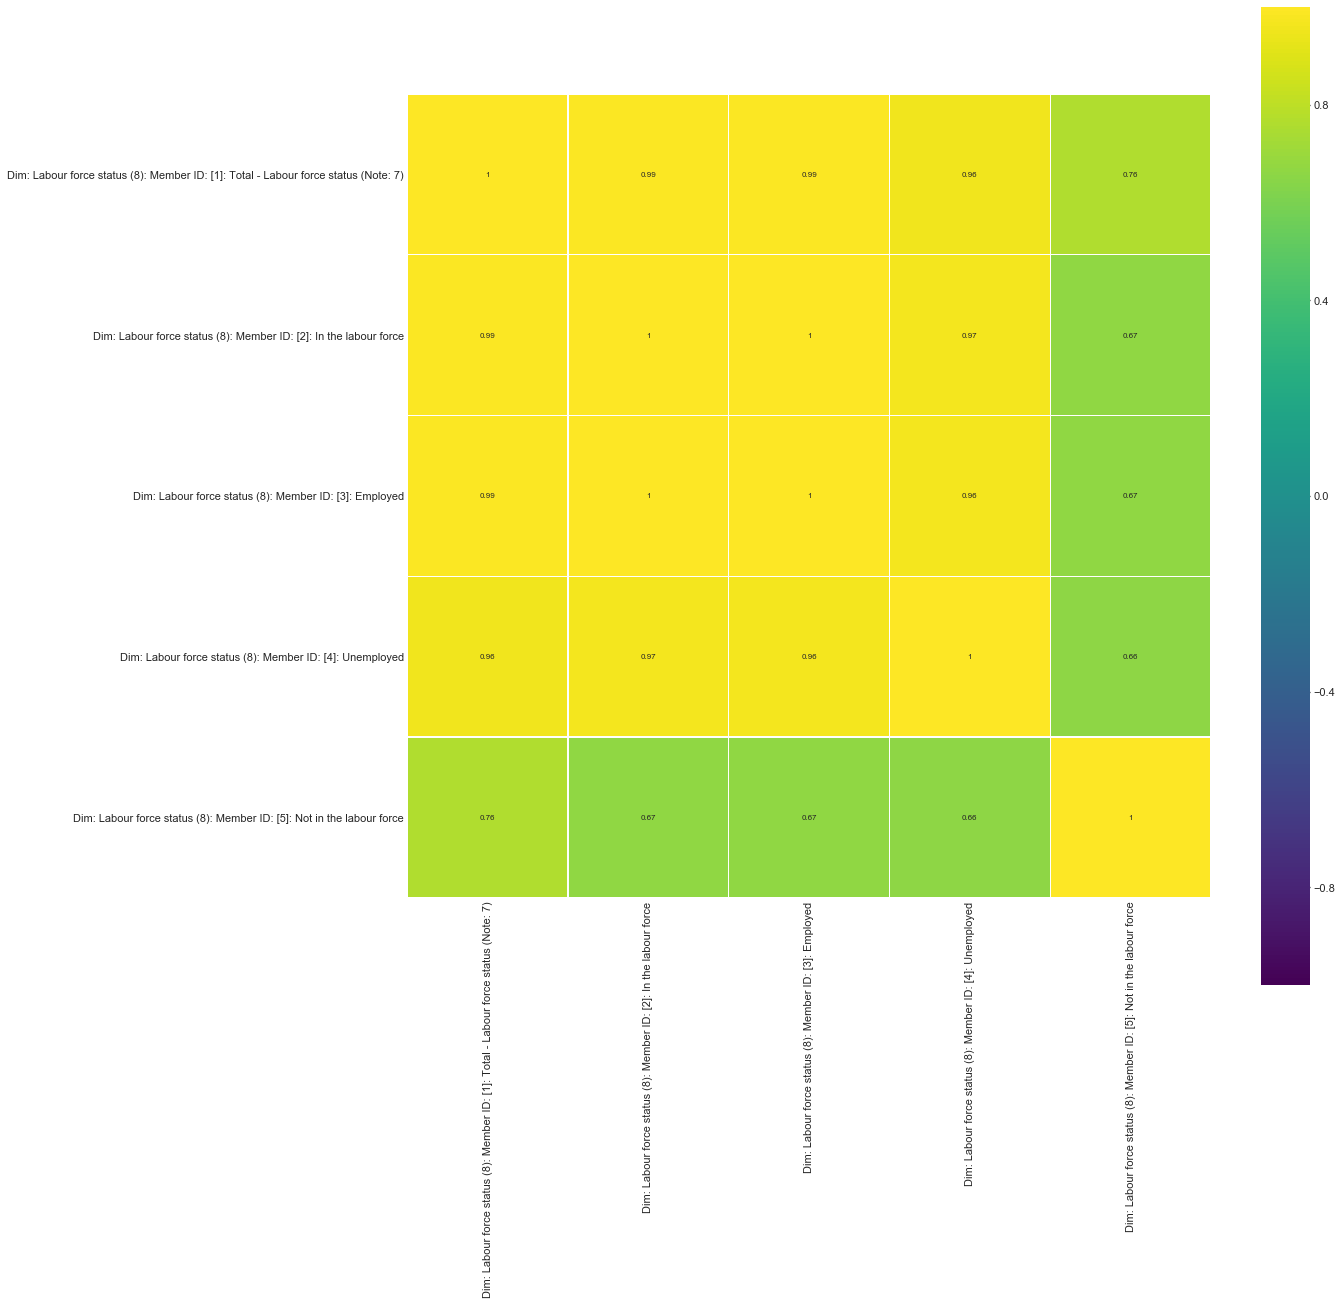

In [368]:
plt.figure(figsize=(18, 18))
sns.heatmap(LaborForce_corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Which labour-related features that impact the total labour force status the most " stronger correlation values"?

In [369]:
LaborForce_corr['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)'][abs(LaborForce_corr['Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)']) > 0.5]

Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7)    1.000000
Dim: Labour force status (8): Member ID: [2]: In the labour force                      0.990836
Dim: Labour force status (8): Member ID: [3]: Employed                                 0.990641
Dim: Labour force status (8): Member ID: [4]: Unemployed                               0.960767
Dim: Labour force status (8): Member ID: [5]: Not in the labour force                  0.761298
Name: Dim: Labour force status (8): Member ID: [1]: Total - Labour force status (Note: 7), dtype: float64

Thus, the labour force status is highly correlated to those features that represent the individuals who are employed, unemployed, or actively looking for a job. 

### Let's check the distribution of the employment rate for Canadian graduates at the given year without considering any other factors.

Average: 71.708780


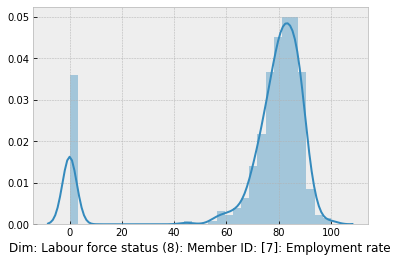

In [192]:
from scipy import stats
sns.distplot(Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate']);
#skewness and kurtosis
print("Average: %f" % Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())

As we see in the plot, we have the larger portion of our samples are concentrated around %72 of the employment rate among the Canadian graduates from a collage or university. However, we can't ignore that there are some outliers reflecting some degree of unemployment. Let's check it out.

### First, does having a degree (after finishing the high school) affect the labour force outcome?

In [479]:
DF3 = Canada_data_final[['Dim: Labour force status (8): Member ID: [7]: Employment rate','DIM: Highest certificate, diploma or degree (11)','DIM: Sex (3)']]


In [480]:
DF3.columns=['Employment rate','Highest degree','Sex']

In [481]:
Employment_Sex_Degree = pd.pivot_table(DF3,index=['Highest degree'],values= 'Employment rate',columns= 'Sex', aggfunc=np.mean)

#### The following table shows the average employment rate for males/females according to their highest degree.

In [482]:
Employment_Sex_Degree

Sex,Female,Male
Highest degree,,
Bachelor's degree,57.612805,66.014634
"College, CEGEP or other non-university certificate or diploma",62.540854,69.439939
Secondary (high) school diploma or equivalency certificate,0.000000,0.000000
University certificate or diploma below bachelor level,54.696951,61.413415
"University certificate, diploma or degree above bachelor level",62.512805,65.898476
"University certificate, diploma or degree at bachelor level or above",62.000610,69.270427


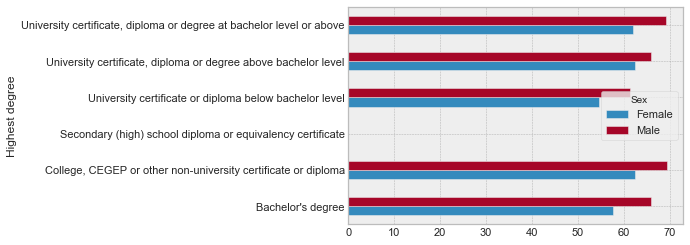

In [483]:
Employment_Sex_Degree.plot(kind='barh')

### Is there particular fields of study that contribute much stronger in the employment patterns than other fields?

In [384]:
DF1 = Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','Dim: Labour force status (8): Member ID: [7]: Employment rate']]
DF1.columns=['Field of Study', 'Average Employment Rate']

In [385]:
AvgEmplymentRate_field = pd.pivot_table(DF1, values= 'Average Employment Rate', index=['Field of Study'], aggfunc=np.mean)

In [388]:
AvgEmplymentRate_field.sort_values('Average Employment Rate')

,Average Employment Rate
Field of Study,
46. Construction trades,13.76125
47. Mechanic and repair technologies/technicians,14.49125
12. Personal and culinary services,18.88000
"60. Dental, medical and veterinary residency programs",30.34500
15. Engineering technologies and engineering-related fields,33.55000
29. Military technologies and applied sciences,41.05500
14. Engineering,57.14875
"28. Military science, leadership and operational art",59.90250
48. Precision production,62.39875


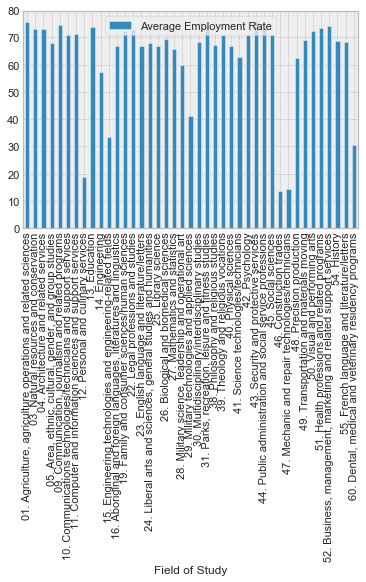

In [437]:
AvgEmplymentRate_field.plot(kind = 'bar')

It looks like that we have some disparities of the employment rate for the different fields of study. 

### What is the impact of the gender differences on the rate of employment/unemployment for Canadian graduates (regardless the geographical areas) ?

In [446]:
print("Average employment rate for women who have graduated from a collage or university is: %f" % Canada_data_final[Canada_data_final['DIM: Sex (3)']=='Female']['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())
print("Average employment rate for men who have graduated from a collage or university is: %f" % Canada_data_final[Canada_data_final['DIM: Sex (3)']=='Male']['Dim: Labour force status (8): Member ID: [7]: Employment rate'].mean())

Average employment rate for women who have graduated from a collage or university is: 59.872805
Average employment rate for men who have graduated from a collage or university is: 66.407378


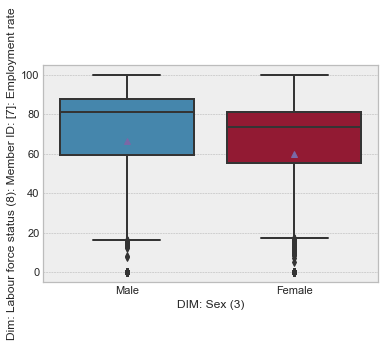

In [450]:
sns.boxplot(y=Canada_data_final['Dim: Labour force status (8): Member ID: [7]: Employment rate'], x= Canada_data_final['DIM: Sex (3)'],showmeans=True)


### Are the gender differences impact the formation of a field of study choice set?

In [443]:
DF2= Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Sex (3)']]

In [444]:
DF2.columns= ['Field of Study','Sex']

In [445]:
DF2.pivot_table(index = ['Field of Study'],columns='Sex',aggfunc=np.count_nonzero).reset_index()

Sex,Field of Study,Female,Male
0,"01. Agriculture, agriculture operations and re...",80,80
1,03. Natural resources and conservation,80,80
2,04. Architecture and related services,80,80
3,"05. Area, ethnic, cultural, gender, and group ...",80,80
4,"09. Communication, journalism and related prog...",80,80
5,10. Communications technologies/technicians an...,80,80
6,11. Computer and information sciences and supp...,80,80
7,12. Personal and culinary services,80,80
8,13. Education,80,80
9,14. Engineering,80,80


So, it is clear that this data reflects equal opportunities of participation among men and women. That's can be explained that this data was collected to answer a question (e.g., impact of field of study on the labour force outcome) with uniform participation from both groups of the gender!

### Within major fields of study are there different employment rates for men/women?

In [433]:
Employment_Sex_field = pd.pivot_table(Canada_data_final,index=['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)'],values= 'Dim: Labour force status (8): Member ID: [7]: Employment rate',columns= 'DIM: Sex (3)', aggfunc=np.mean)

In [436]:
Employment_Sex_field

DIM: Sex (3),Female,Male
DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43),,
"01. Agriculture, agriculture operations and related sciences",70.9325,80.3900
03. Natural resources and conservation,71.7575,74.6600
04. Architecture and related services,69.4650,76.9075
"05. Area, ethnic, cultural, gender, and group studies",66.5125,69.7250
"09. Communication, journalism and related programs",73.2125,75.6075
10. Communications technologies/technicians and support services,67.3875,74.1075
11. Computer and information sciences and support services,66.0525,76.1325
12. Personal and culinary services,15.2675,22.4925
13. Education,72.0500,75.7675


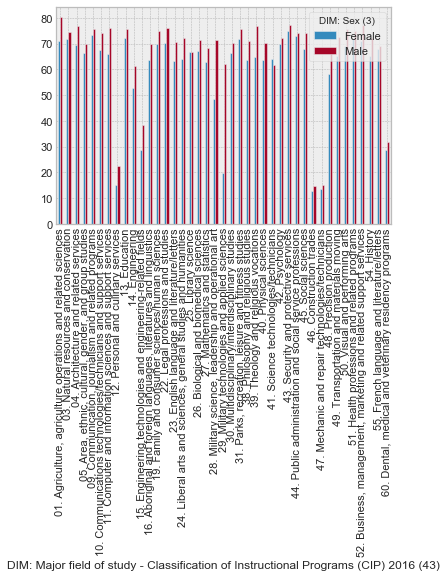

In [478]:
Employment_Sex_field.plot(kind = 'bar')

### How about the age, does the age affect the employment rate for different fields of study? 

In [484]:
DF5= Canada_data_final[['DIM: Major field of study - Classification of Instructional Programs (CIP) 2016 (43)','DIM: Age (9)','Dim: Labour force status (8): Member ID: [7]: Employment rate']]

In [485]:
DF5.columns=['Field of Study','Age' ,'Average Employment Rate']

In [487]:
Employment_Age_field = pd.pivot_table(DF5,index=['Field of Study'],values= 'Average Employment Rate',columns= 'Age', aggfunc=np.mean)
Employment_Age_field

Age,15 to 24 years,25 to 34 years,25 to 54 years,25 to 64 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over
Field of Study,,,,,,,,
"01. Agriculture, agriculture operations and related sciences",63.066667,71.775000,72.366667,69.766667,72.466667,72.691667,62.175000,20.100000
03. Natural resources and conservation,58.991667,68.958333,71.391667,68.150000,73.050000,72.908333,55.333333,19.275000
04. Architecture and related services,52.925000,69.291667,70.741667,68.816667,70.975000,71.616667,61.025000,22.516667
"05. Area, ethnic, cultural, gender, and group studies",52.625000,64.666667,66.591667,64.075000,68.391667,66.100000,52.475000,19.200000
"09. Communication, journalism and related programs",60.716667,72.258333,72.083333,69.716667,72.308333,71.391667,56.866667,20.725000
10. Communications technologies/technicians and support services,54.600000,71.766667,71.591667,69.033333,70.741667,71.058333,50.783333,12.075000
11. Computer and information sciences and support services,54.133333,66.333333,69.358333,67.366667,70.091667,71.308333,55.858333,19.500000
12. Personal and culinary services,13.233333,13.675000,21.800000,35.891667,13.450000,13.241667,10.866667,3.708333
13. Education,65.025000,73.483333,74.508333,67.950000,74.866667,74.708333,50.216667,11.966667


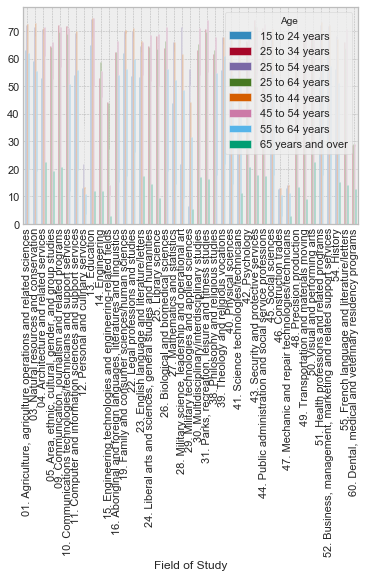

In [490]:
Employment_Age_field.plot(kind='bar')

## In another part of analysis, we may compare the impact of the major field of study on the labour force outcome in different provinces or cities in Canada!